第1次迭代：
[1 1 1 1]
[1 1 1 1]
[0 0 1 0]
[ 0 -1  1 -1]
第2次迭代：
[ 1 -1  2  0]
[ 1 -1  2  0]
[ 0 -2  2 -1]
[ 0 -2  2 -1]
第3次迭代：
[ 0 -2  2 -1]
[ 0 -1  3  0]
[ 0 -1  3  0]
[ 0 -1  3  0]
第4次迭代：
[ 0 -1  3  0]
[ 0 -1  3  0]
[ 0 -1  3  0]
[ 0 -1  3  0]
迭代了4次后，得到了收敛的解。
判别函数为：g(x) = 0 * x1 + -1 * x2 + 3 * x3 + 0 * x4 


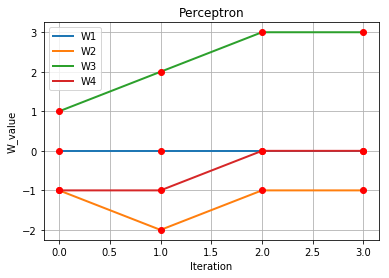

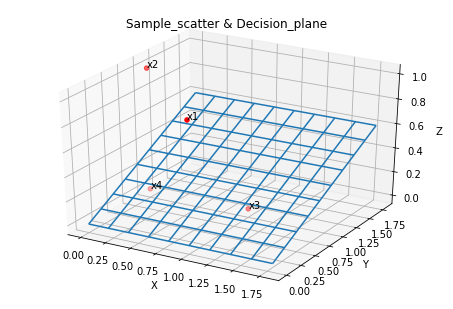

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = np.array([1, 0, 1, 1])
x2 = np.array([0, 1, 1, 1])
x3 = np.array([1, 1, 0, 1])
x4 = np.array([0, 1, 0, 1])

w = np.array([1, 1, 1, 1])
pk = 1
iteration = 0

W1 = np.array([0, 0, 0, 0])
W2 = np.array([0, 0, 0, 0])
W3 = np.array([0, 0, 0, 0])
W4 = np.array([0, 0, 0, 0])

while(1):
    print('第%d次迭代：' % (iteration + 1))
    if(np.dot(w.T, x1) <= 0):
        w = w + pk * x1
        w1 = w
    else:
        w1 = w
    print(w)

    if(np.dot(w.T, x2) <= 0):
        w = w + pk * x2
        w2 = w
    else:
        w2 = w
    print(w)

    if(np.dot(w.T, x3) >= 0):
        w = w - pk * x3
        w3 = w
    else:
        w3 = w
    print(w)

    if(np.dot(w.T, x4) >= 0):
        w = w - pk * x4
        w4 = w
    else:
        w4 = w
    print(w)

    W1[iteration] = w[0]
    W2[iteration] = w[1]
    W3[iteration] = w[2]
    W4[iteration] = w[3]

    iteration = iteration + 1
    if((w1 == w2).all() & (w2 == w3).all() & (w3 == w4).all()):
        break

print("迭代了%d次后，得到了收敛的解。" % iteration)
print("判别函数为：g(x) = %d * x1 + %d * x2 + %d * x3 + %d * x4 " % (w[0], w[1], w[2], w[3]))

# 画图
# 权值迭代图
plt.figure()
X = range(0, iteration, 1)
plt.plot(X, W1, lw = 2, label = 'W1')
plt.plot(W1, 'ro') # 标注线上的红色点
plt.plot(X, W2, lw = 2, label = 'W2')
plt.plot(W2, 'ro')
plt.plot(X, W3, lw = 2, label = 'W3')
plt.plot(W3, 'ro')
plt.plot(X, W4, lw = 2, label = 'W4')
plt.plot(W4, 'ro')
plt.grid(True) # 显示网格
plt.legend(loc = 0) # 图例放在图的最佳位置
plt.axis('tight')
plt.xlabel('Iteration')
plt.ylabel('W_value')
plt.title('Perceptron')

# 样本散点图
figure = plt.figure()
axes = Axes3D(figure)
X = [x1[0], x2[0], x3[0], x4[0]]
Y = [x1[1], x2[1], x3[1], x4[1]]
Z = [x1[2], x2[2], x3[2], x4[2]]
axes.scatter(X, Y, Z, c = 'r')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('Z')
name = ['x1', 'x2', 'x3', 'x4']
for i in range(len(X)):
    axes.text(X[i], Y[i], Z[i], name[i])

# 画判决平面
X1 = np.arange(0, 2, 0.2)
Y1 = np.arange(0, 2, 0.2)
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = (-1) * (w[0] / w[2]) * X1 - (w[1] / w[2]) * Y1
axes.plot_wireframe(X1, Y1, Z1)

axes.set_title('Sample_scatter & Decision_plane')

plt.show()